In [1]:
#An RBF network  with m=40 centroids with ten binary outputs (number of classes of MNIST dataset).

from __future__ import print_function
from sklearn.gaussian_process.kernels import PairwiseKernel
import keras
#from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam, SGD

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#                         PREPROCESSING DATA

# Change from matrix to array --> dimension 28x28 to array of dimention 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (one hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



#                       KMEANS to find centers

kmeans_model = KMeans(n_clusters = 40)   #find 10 centers with kmeans on training samples
kmeans_model.fit(x_train)
centers = kmeans_model.cluster_centers_
print (centers)
x = kmeans_model.predict(kmeans_model.cluster_centers_)
x = keras.utils.to_categorical(x, 40)


y_trainn= kmeans_model.predict(x_train)
y_trainn=keras.utils.to_categorical(y_trainn,40)
y_testt=kmeans_model.predict(x_test)
y_testt=keras.utils.to_categorical(y_testt, 40)


#                       RBF LAYER

kernel = PairwiseKernel(metric='polynomial')   #GPR uses the kernel to define the covariance of the training sample
rbf_model = GaussianProcessRegressor(kernel=kernel).fit(centers, x)

temp1 = rbf_model.predict(x_train)
temp2 = rbf_model.predict(x_test)


#                      PERCEPTRONS LAYERS
batch_size = 128
epochs = 10
img_size = 28 * 28

model = Sequential()
model.add(Dense(img_size, activation='relu', input_shape=(40,)))
model.add(Dropout(0.2))
model.add(Dense(40, activation='softmax'))

model.summary()

nadam=keras.optimizers.Nadam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])


#                      TRAINING THE MODEL
history = model.fit(temp1, y_trainn,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(temp2, y_testt))

#                      EVALUATE TRAINED MODEL
score = model.evaluate(temp2, y_testt, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               32144     
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                31400     
Total params: 63,544
Trainable params: 63,544
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/step - loss: 1.2956 - acc:

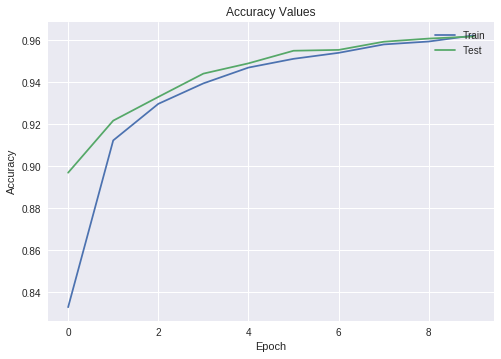

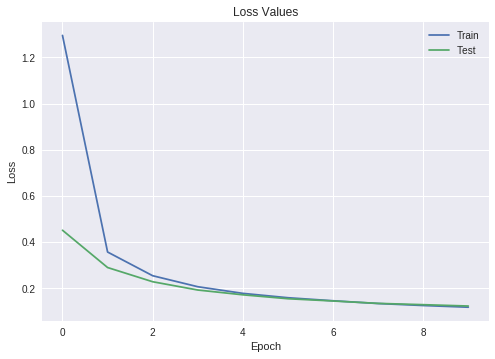

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

total weights 4
weight # 0
[[ 0.2615671  -0.20200732  0.24447109 ... -0.26905042  0.2720943
   0.31034496]
 [-0.14139077  0.17044133 -0.09761042 ...  0.0260457  -0.01215041
   0.02174272]
 [-0.16464728  0.3249817   0.06263116 ... -0.25011566  0.09813783
  -0.02161093]
 ...
 [ 0.48423752 -0.17110775  0.1261501  ... -0.01095376  0.2818976
   0.21549086]
 [-0.02737253 -0.38875055  0.19064946 ...  0.012902   -0.2805652
   0.16457546]
 [ 0.27879292 -0.13403061  0.31410384 ...  0.30845502  0.36861977
  -0.01225084]]
weight # 1
[0.08063956 0.12596685 0.1370219  0.09756581 0.16944782 0.16410038
 0.10508146 0.24852419 0.18679267 0.24995852 0.21319604 0.11183179
 0.11199301 0.08881095 0.11981624 0.25134444 0.08444713 0.17310156
 0.16423905 0.1601978  0.22126251 0.1002992  0.17520788 0.25128952
 0.09346817 0.15866807 0.06956217 0.13042584 0.12759574 0.10954535
 0.10318253 0.21553017 0.33653554 0.18936567 0.15448326 0.26831055
 0.11169226 0.23063934 0.08174959 0.04512677 0.11453716 0.24779001
 0.1

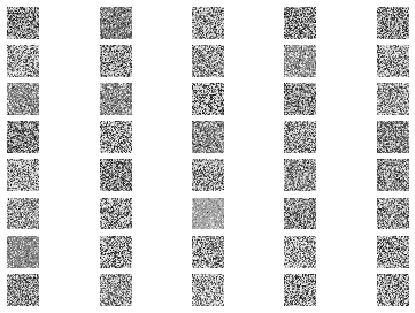

In [3]:
print("total weights",len(model.get_weights()))
for i in range(len(model.get_weights())):
#  print(model.get_weights()[i].shape)
  
  print("weight #", i)
  print(model.get_weights()[i])
weights = model.get_weights()[0]
for i in range(len(weights)):
  ax = plt.subplot(len(weights)/5, 5, i + 1)
  plt.imshow(weights[i].reshape(28, 28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()